#HW #3: Unsupervised Learning Practice
##Cindy Chen

###First, import the red wine csv file into a pandas dataframe from the following website:

In [58]:
#load all my necessary packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [59]:
#import data
redwinedata = pd.read_csv("winequality-red.csv", sep = ";")
redwinedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [60]:
#scale data
redwinedata = pd.DataFrame(scale(redwinedata), index = redwinedata.index, columns = redwinedata.columns)
redwinedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


###1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

###Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

**ANSWER:**
> I chose to use a cluster count of 7 for my analysis since my elbow curve chart shows me that the reduction in cluster variance slows down after 7 clusters.

> In running my KMeans clustering (see Step 2), I identified three clusters whose relative quality has a mean above 0.  However, since one cluster's positive Quality is relatively close to 0, I focused on the other two clusters.  To identify the variables that cluster with higher values of wine quality, I looked for variables within those 2 clusters whose values were in the same direction of the mean of zero.  Accordingly, I can see that higher quality wines have the following properties:
* LOWER residual sugar
* LOWER chlorides
* LOWER Total sulfur dioxide
* LOWER density
* HIGHER alcohol

###If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

> **ANSWER:**  If I want to make a good bottle of wine, it should have the following three key properties.  My approach involved identifying the 2 clusters with the most extreme quality values, finding the absolute difference between each of their variables (since they've been scaled), sorting these differences, and then identifying the variables whose absolute difference was greater than 1.  You can read more details in Step 3.

* HIGH citric acid
* HIGH alcohol
* LOW Volatile acidity

**Step 1. Run iterations to determine how many clusters I would like to work with.  Although our task is to evaluate the properties of good vs bad quality wine, it is worth confirming that two clusters is appropriate.**

In [61]:
#set up an empty list
within_cluster_variance = []

#iterate over the cluster counts to determine how many clusters I should actually include in my analysis
for k in range(1, 20):
  kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
  kmeans.fit(redwinedata)
  within_cluster_variance.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

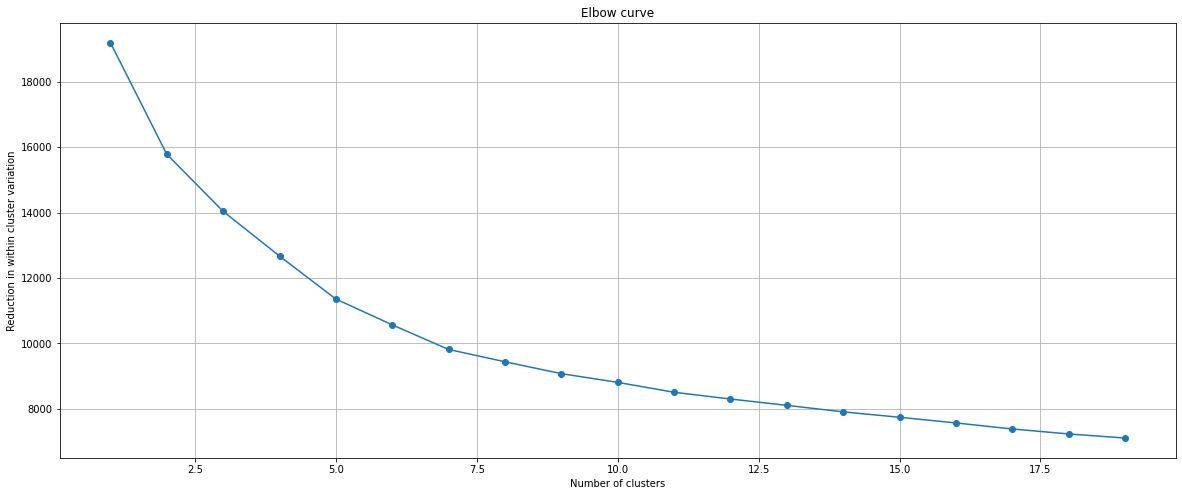

In [62]:
fig = plt.figure(figsize=(20, 8))
plt.plot(range(1, 20), within_cluster_variance, marker = 'o')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Reduction in within cluster variation")

plt.title("Elbow curve")
#Even though the "elbow" isn't sharp, this tells me that maybe I'll use 7 clusters

**Step 2. Rerun k-means clustering with 7 clusters, assign the labels to a new column in the data set**

In [70]:
kmeans2 = KMeans(n_clusters = 7, n_init = 20, random_state = 0)
kmeans2.fit(redwinedata)
redwinedata['cluster_label'] = kmeans2.labels_

display(redwinedata.groupby('cluster_label').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster_label,,,,,,,,,,,,
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
1,-0.420156,0.656017,-0.775374,-0.209114,-0.043523,-0.485020,-0.403903,0.022353,0.326200,-0.419134,-0.530249,-0.522024
2,0.274931,-0.995948,0.760357,-0.100299,-0.239503,-0.339035,-0.534853,-0.504335,-0.262586,0.464222,1.017843,1.036154
3,-0.129104,0.024433,0.059217,-0.020755,-0.039037,1.000384,1.233360,0.199368,-0.093861,-0.170695,-0.572635,-0.425465
4,1.670613,-0.552718,1.218735,0.119453,0.051873,-0.487175,-0.432252,1.204802,-0.990313,0.222824,-0.141317,0.090223
5,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
6,-1.068854,0.381386,-0.906928,-0.240375,-0.405477,0.228604,-0.200282,-1.291046,1.143397,-0.133951,1.137160,0.474330


In [71]:
#As a gut check, I will evaluate the cluster counts to ensure that my 7 clusters are comparable in size.
redwinedata.groupby('cluster_label').count()[['fixed acidity']]

,fixed acidity
cluster_label,
0,34
1,480
2,273
3,335
4,237
5,29
6,211


**Step 3: To determine what is most important in differentiating good quality wine from bad quality wine, I want to take the absolute difference between clusters 0 and 1 (which yield the largest difference in quality) on each metric.  Variables with the largest distances would imply that they differentiate the quality.**

In [91]:
my_comparison = redwinedata.groupby('cluster_label').mean()
display(abs(my_comparison.iloc[1,] - my_comparison.loc[2,]).sort_values(ascending = False))

volatile acidity        1.651965
quality                 1.558179
alcohol                 1.548092
citric acid             1.535730
sulphates               0.883356
fixed acidity           0.695087
pH                      0.588787
density                 0.526688
chlorides               0.195979
free sulfur dioxide     0.145985
total sulfur dioxide    0.130950
residual sugar          0.108815
dtype: float64

###2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

###Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

> **ANSWER:** Running the hierarchical clustering yielded 4 clusters with quality values above the mean of 0. Dropping one of hte clusters with a very small quality value above 0, I focused on the remaining three groups.  Where their variables were all above or below the mean of zero for their respective characteristic, I noted it as a variable that produces higher values of wine quality.  Accordingly, good quality red wines have the following general properties:

* HIGHER alcohol
* LOWER chlorides

###If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

> **ANSWER:** The qualities most important to making a good bottle of wine according to this analysis are the seven following.  My approach to identifying these variables involved finding the clusters with the most extreme quality values and then calculating the absolute difference between the clusters for each variable.  Afterward, I sorted the differences, filtered the list to variables whose differences were greater than 2:
* LOW Chlorides
* LOW Sulphates
* HIGH total sulfur dioxide
* HIGH residual sugar
* HIGH free sulfur dioxide
* HIGH alcohol
* LOWER density

**STEP 1. Run hierarchal clustering and assign the cluster label to a new column in the data set.**

In [33]:
#remove the cluster_label column that we created using KMeans clustering so that it doesn't factor into our hierarchal clustering
redwinedata = redwinedata.drop(['cluster_label'], axis = 1)

#cluster
ac = AgglomerativeClustering(n_clusters = 7,
                             linkage = "complete",
                             affinity = "euclidean") #already defaults to Euclidean but I wanted to explicitly state it

In [34]:
#assign labels to a new column in the data set

labels = ac.fit_predict(redwinedata)
redwinedata['hierarchal_cluster'] = labels
redwinedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hierarchal_cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,2
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,2
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,2
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,2


Visualize using a dendogram to see if the results seem intuitive.

<function matplotlib.pyplot.show>

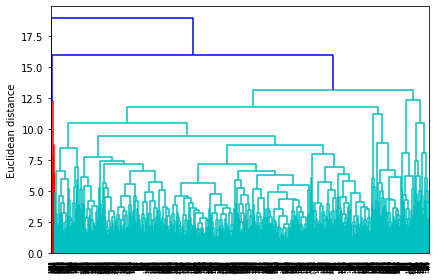

In [35]:
#create visualization of dendrogram to confirm our cluster
row_clusters = linkage(pdist(redwinedata, metric = "euclidean"), method = "complete")

row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show

**Step 2. Calculate means for the two hierarchal clusters so that I can evaluate properties of better or worse quality wines.**

In [36]:
display(redwinedata.groupby('hierarchal_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
hierarchal_cluster,,,,,,,,,,,,
0,-1.097587,0.430947,-0.721546,-0.283762,-0.402129,-0.181139,-0.185685,-1.592195,1.127159,-0.297306,1.529161,0.165001
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
2,0.009946,-0.002846,-0.029360,-0.042682,-0.107648,0.023370,-0.003717,0.069548,0.012269,-0.125419,-0.114821,-0.027203
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437
6,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719


**STEP 3. Calculate the absolute difference between the rows by property so that I can find the largest distances.  This tells me what variables are most important in differentiating between good and poor quality wine. I have used clusters 4 and 3 since they have the most extreme quality values as their centers.**

In [37]:
my_comparison_2 = redwinedata.groupby('hierarchal_cluster').mean()
abs(my_comparison_2.iloc[4,] - my_comparison_2.iloc[3,]).sort_values(ascending = False)

chlorides               11.792273
sulphates                6.550452
total sulfur dioxide     5.635795
residual sugar           5.250137
free sulfur dioxide      2.773292
quality                  2.683787
alcohol                  2.096369
density                  1.955751
citric acid              1.763033
pH                       1.403844
volatile acidity         0.940390
fixed acidity            0.699012
dtype: float64

###3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

> **Answer:**  My first two components only explain about 45% of my data's variance, which is quite low.  Ideally, I would want the majority of the variance explained by my components.

> I might use my first two principal components to narrow down the variables for supervised learning, because PCA helps me identify variables that are very similar to each other while preserving the general relationship between my data points.  In turn, this could help speed up my supervised learning, since certain predictive models prefer that predictors are minimally correlated.

> In my biplot, we can see that chlorides, residual sugars, and density almost overlap with each other, suggesting that they are very similar variables.  Since chlorides and residual sugars vectors have short lengths, we're also confident that they're not very important in explaining our data's distribution. PCA accordingly helps inform my decision to drop certain variables like those previously mentioned without affecting my data points' relationship with each other.  Likewise, we can see that Fixed Acidity is most aligned with the first component and Total Sulfur Dioxide is most aligned with the second component. This suggests that these variables are very important to keep for subsequent analyses like supervised learning so I also know to keep these if I'm considering reducing my variables.

**Step 1: Fit Principal Components Analysis on my model**

In [38]:
#let us reset our data frame to remove our cluster labels
redwinedata = redwinedata.drop(['hierarchal_cluster'], axis = 1)
redwinedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


In [39]:
#fit PCA to our data and reduce our data down to 2 dimensions
pca = PCA().fit(redwinedata)

#print out the explained standard deviation so that we can pinpoint an elbow
print(np.sqrt(pca.explained_variance_))

[1.76723537 1.49775999 1.29767979 1.10262469 0.98684987 0.81425235
 0.78657786 0.71146969 0.64153326 0.57282161 0.42465446 0.24403926]


**Step 2: Visualize my components so that I can easily see the cumulative variance explained by my components.**

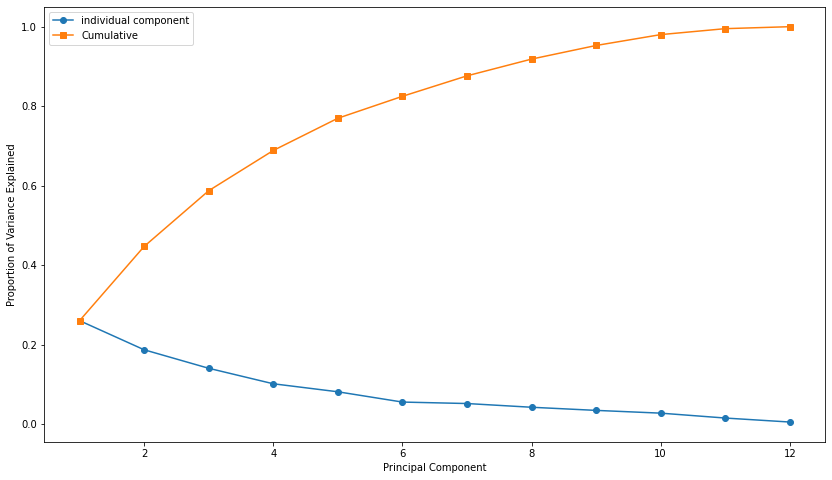

In [40]:
plt.figure(figsize = (14, 8))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], pca.explained_variance_ratio_, '-o', label = "individual component")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.cumsum(pca.explained_variance_ratio_), '-s', label = "Cumulative")

plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component")
plt.legend(loc=2)

**Step 3. Reduce dimensions and print out the new principal components.**

In [47]:
#dimension reduction
pca_2 = PCA(n_components=2)
pca_2.fit(redwinedata)
redwine_pca = pca_2.transform(redwinedata) # create X data with single pca vector

print("original shape:   ", redwinedata.shape)
print("transformed shape:", redwine_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 2)


In [42]:
df_plot = pd.DataFrame(pca_2.fit_transform(redwinedata), columns = ['PC1', 'PC2'], index = redwinedata.index)
df_plot.head(10)

,PC1,PC2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
5,-1.742298,1.181661
6,-1.254988,1.144557
7,-2.057168,-1.016830
8,-0.925772,-0.649469
9,0.529128,1.299502


**Step 4. Visualize the two principal components along with the columns so that we can approximate which variables are closest to the components in order to answer the final question.**

In [44]:
pca_loadings = pd.DataFrame(PCA().fit(redwinedata).components_.T, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'], index = redwinedata.columns)
pca_loadings.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


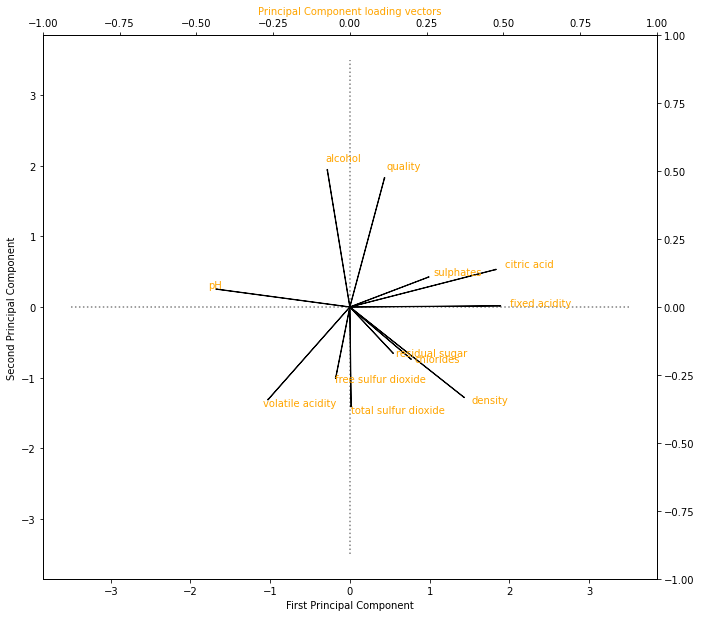

In [45]:
#Create the chart of principal component loading vectors
fig, ax1 = plt.subplots(figsize = (11, 10))

#I am not plotting out the rows (in other words, the individual wines) since it doesn't matter for answering this question and there are too many wines anyway that they crowd the graph
ax1.hlines(0, -3.5, 3.5, linestyles = "dotted", colors = "grey")
ax1.vlines(0, -3.5, 3.5, linestyles = "dotted", colors = "grey")

ax1.set_xlabel("First Principal Component")
ax1.set_ylabel("Second Principal Component")

ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.tick_params(axis = "y", color = "orange")
ax2.set_xlabel("Principal Component loading vectors", color = "orange")

a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
  ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color = "orange")

ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,pca_loadings.V1[9], -pca_loadings.V2[9])
ax2.arrow(0,0,pca_loadings.V1[10], -pca_loadings.V2[10])
ax2.arrow(0,0,pca_loadings.V1[11], -pca_loadings.V2[11])